#### GISC 420 T1 2021
# Introducing `geopandas`

In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as pyplot

During this course we will often use the [`geopandas`](http://geopandas.org/) package to explore handling spatial data programatically. 

That name probably requires at least a little bit of explanation. [`pandas`](http://pandas.pydata.org/index.html) is an advanced package for manipulating tables of data.  The name is an approximate acronym for Python Data Analysis library.  Anyway, `geopandas` combines `pandas` (data tables) with number of other packages, in particular, `shapely` (https://pypi.python.org/pypi/Shapely) which deals with geometry and `fiona` (https://pypi.python.org/pypi/Fiona) which handles spatial data formats.

So... let's import geopandas.

In [2]:
import geopandas

Like `import math` this gives us access to a specialised collection of functions and objects, this time for dealing with spatial data.

## Opening a spatial data file
This is simple. The `read_file()` function will do the trick, and provided the file format makes sense, and is consistent with the file extension, you should have no issues.

In [3]:
counties = geopandas.read_file('ca-counties.gpkg')

/home/osullid3/anaconda3/envs/g420/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Assign the file read result to a suitable variable name, and from there on you are dealing with a geopandas `GeoDataFrame` object, which allows us to examine the contents.  The `.head()` function will show us the first few rows of the data table.

In [4]:
counties.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,Id,Id2,Geography,nPop,medAge,pMale,pFemale,pWhite,pAfrAmer,pAIAAN,pAsian,pHispLat,geometry
0,0500000US06035,06,035,Lassen,County,4541.184,0500000US06035,6035.0,"Lassen County, California",34895.0,37.1,64.2,35.8,73.2,8.1,3.5,1.0,17.5,"POLYGON ((-1987463.480 2226526.403, -1988276.7..."
1,0500000US06049,06,049,Modoc,County,3917.770,0500000US06049,6049.0,"Modoc County, California",9686.0,46.1,50.4,49.6,83.5,0.8,3.8,0.8,13.9,"POLYGON ((-1992479.502 2368289.270, -1979793.5..."
2,0500000US06075,06,075,San Francisco,County,46.873,0500000US06075,6075.0,"San Francisco County, California",805235.0,38.5,50.7,49.3,48.5,6.1,0.5,33.3,15.1,"MULTIPOLYGON (((-2327571.713 1962238.416, -232..."
3,0500000US06083,06,083,Santa Barbara,County,2735.085,0500000US06083,6083.0,"Santa Barbara County, California",423895.0,33.6,50.2,49.8,69.6,2.0,1.3,4.9,42.9,"MULTIPOLYGON (((-2157044.759 1492725.499, -215..."
4,0500000US06091,06,091,Sierra,County,953.214,0500000US06091,6091.0,"Sierra County, California",3240.0,50.9,50.8,49.2,93.3,0.2,1.4,0.4,8.3,"POLYGON ((-2025185.240 2081852.452, -2031048.3..."


The important thing to notice here, is the **geometry** column in the table. It may not show up in the table view above unless you scroll to the right. Let's take a look at it

In [5]:
counties.geometry.head()

0    POLYGON ((-1987463.480 2226526.403, -1988276.7...
1    POLYGON ((-1992479.502 2368289.270, -1979793.5...
2    MULTIPOLYGON (((-2327571.713 1962238.416, -232...
3    MULTIPOLYGON (((-2157044.759 1492725.499, -215...
4    POLYGON ((-2025185.240 2081852.452, -2031048.3...
Name: geometry, dtype: geometry

We can also use an alternative notation to access individual columns in the data table.

In [6]:
counties['geometry'].head()

0    POLYGON ((-1987463.480 2226526.403, -1988276.7...
1    POLYGON ((-1992479.502 2368289.270, -1979793.5...
2    MULTIPOLYGON (((-2327571.713 1962238.416, -232...
3    MULTIPOLYGON (((-2157044.759 1492725.499, -215...
4    POLYGON ((-2025185.240 2081852.452, -2031048.3...
Name: geometry, dtype: geometry

What is a geometry? 

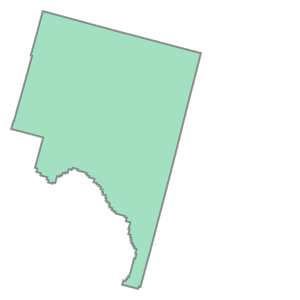

In [7]:
counties.geometry[0]

Cool! You just made a map of Lassen County, California. Not a particularly useful map, but a map nevertheless.

The geometry column in a `GeoDataFrame` can store points, polygons, line segments or a variety of other `shapely` geometries, which can then be manipulated and managed in various ways according to our needs.

### Let's make some maps!

This turns out to be very simple, at least for a basic map.

<AxesSubplot:>

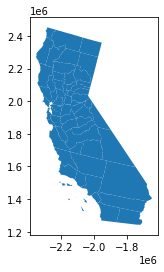

In [8]:
counties.plot()

Kinda small. Try again, this time using `figsize` to specify a width and height. The units are inches, and the final size of plot will depend on the screen resolution, so this is not a simple matter. For now, just know that you can change the map size.

<AxesSubplot:>

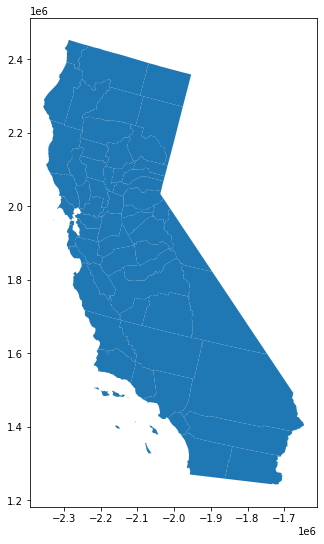

In [9]:
counties.plot(figsize=(6,9))

We can manipulate the look of this with a variety of other options in the `plot()` function. For example...

<AxesSubplot:>

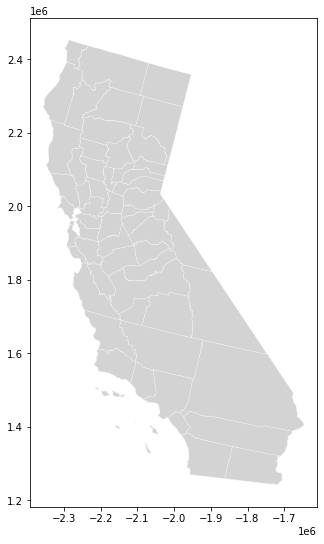

In [10]:
counties.plot(figsize=(6,9), linewidth=0.25, edgecolor='w', facecolor='lightgray')

You can find out more about the plotting options for basic maps in geopandas from [the documentation](http://geopandas.org/mapping.html) and also from the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html). 

For closer control over things, you need to a work at a lower level with the [`pyplot` API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot). For example, to put county names on the map, this will work.

<AxesSubplot:>

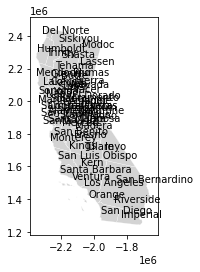

In [11]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
for polygon, name in zip(counties.geometry, counties.NAME):
    ax.annotate(xy=(polygon.centroid.x-50000, polygon.centroid.y), text=name)
counties.plot(ax=ax, linewidth=0.25, edgecolor='w', facecolor='lightgray')

Pretty ugly, both the map and the code. There is no getting away from the fact that the plotting libraries available in Python are not much fun to work with (although mostly that is not why we are using Python anyway).

We won't worry too much for now about the details of how to use `pyplot`. Generally I will provide outline code that you can modify easily to make more complicated plots.

For example, in the cell below, copy the code from the cell above, but make the plot larger so that we can read the county names more easily. Also experiment with changing some of the colours.

In [12]:
# Copy and paste some code here






It is possible to make nice maps in geopandas, but to make finished publication quality maps, you will most likely want to export the map to a graphical file format for final tidy up in a package such as Inkscape or Illustrator. We aren't particularly concerned at the moment with publication quality maps so I'll just note the possibility and move on.

In [13]:
## For example, you could do this, to make an SVG file
## which you can read into Inkscape
fig.savefig('ca.svg')

## Mapping data
Our concern here is with *data* as much as with maps, so how can we map the data in that table we saw above?

We simply tell the `plot()` function what column in the data table to map.  Let's work initially with the `nPop` column which tells us the number of people recorded in the census in each county.

<AxesSubplot:>

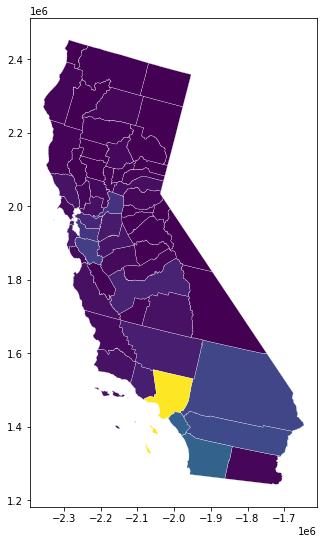

In [14]:
counties.plot(column='nPop', linewidth=0.25, edgecolor='w', figsize=(6,9))

Well, that kind of worked. Although the colour scheme is not the best. We can change that by specifying a different colour palette with the `cmap` setting (for 'colour map'). The named colour maps available are listed at [this page](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). Experiment with some different ones.

<AxesSubplot:>

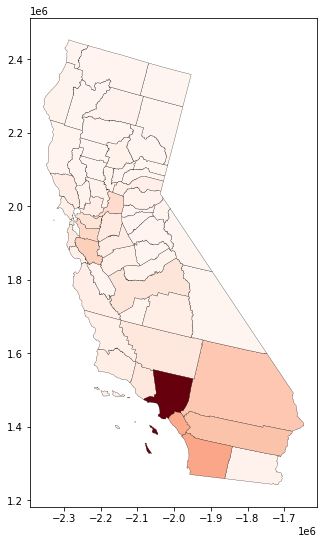

In [15]:
counties.plot(column='nPop', cmap='Reds', linewidth=0.25, edgecolor='k', figsize=(6,9))

So we can control colours, but it's still not a great map. What's the problem now? 

It turns out that in the US, counties are bad units for many kinds of analysis because they have radically different populations. We can see this by making a histogram of the county populations. 

(array([49.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.175000e+03, 9.829180e+05, 1.964661e+06, 2.946404e+06,
        3.928147e+06, 4.909890e+06, 5.891633e+06, 6.873376e+06,
        7.855119e+06, 8.836862e+06, 9.818605e+06]),
 <BarContainer object of 10 artists>)

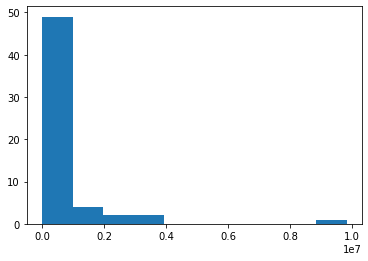

In [16]:
pyplot.hist(counties.nPop)

There are 53 counties in California. 49 of them have populations under 1 million (well under that in fact), while Los Angeles county has *over 9 million*! That very skewed distribution means we have to think carefully about how to map such data in a meaningful way. 

Take a look at the code below.

<AxesSubplot:>

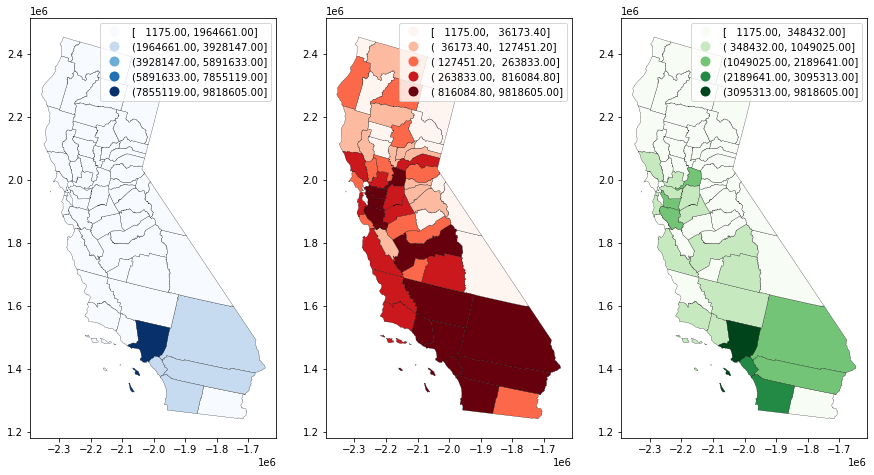

In [17]:
# set up a figure with three plots 
fig = pyplot.figure(figsize=(15, 8))

# 131 means 1 row by 3 columns, 1st plot
ax1 = fig.add_subplot(131)
counties.plot(ax=ax1, column='nPop', cmap='Blues', 
              scheme='equal_interval', 
              linewidth=0.25, edgecolor='k', 
              legend=True)

# 131 means 1 row by 3 columns, 2nd plot
ax2 = fig.add_subplot(132)
counties.plot(ax=ax2, column='nPop', cmap='Reds', 
              scheme='quantiles', linewidth=0.25, 
              edgecolor='k', 
              legend=True)

# 131 means 1 row by 3 columns, 3rd plot
ax3 = fig.add_subplot(133)
counties.plot(ax=ax3, column='nPop', cmap='Greens', 
              scheme='fisher_jenks', 
              linewidth=0.25, edgecolor='k', 
              legend=True)

This makes three maps, each of them using a different *classification scheme* as you may be familiar with from GIS usage. A classification scheme splits the date differently to determine which values to associate with what colours.

You can learn more about the available classification schemes [here](https://pysal.org/notebooks/viz/mapclassify/intro.html).

## Have an explore

For now, in the cell below, experiment with making some maps of other columns in the data table.  Experiment with the `edgecolor`, `linewidth` and `facecolor` options.  Also change the color map `cmap` setting.  A list of the available color maps is [provided here](http://matplotlib.org/users/colormaps.html). Also experiment with classification schemes and the number of classes (specified by `k`). You can learn more about available classification schemes on [this page](https://pysal.org/notebooks/viz/mapclassify/intro.html).

<AxesSubplot:>

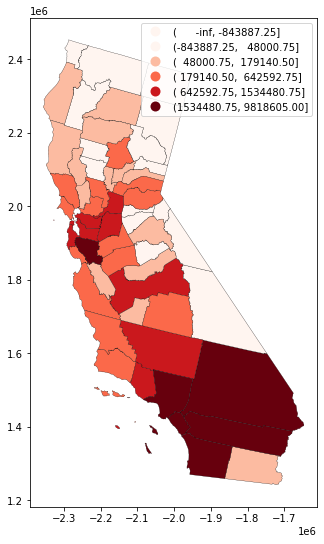

In [18]:
# Experiment with this code to make other maps
counties.plot(column='nPop', cmap='Reds', scheme='BoxPlot', 
              linewidth=0.25, edgecolor='k', k=9, 
              figsize=(6,9), 
              legend=True)